# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation
The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week:
    - Week sale was made, counted as weeks since product launch. Data is numeric and contains integers from 1 to 6. No missing values were found. No cleaning is needed.

- sales_method:
    - Character, which of the three sales methods were used for that customer. The expected methods are "Email", "Call", and "Email and call".
    - Five distinct values were found: "Email", "Email + Call", "Call", "em + call", and "email". There's a slight variation with expected method. No missing values. Maintain consistency needed.

- customer_id:
    - Character, unique identifier for the customer. No missing values were found. No cleaning is needed.

- nb_sold:
    - Numeric, number of new products sold.No missing values were found. No cleaning is needed.

- revenue:
    - Numeric, revenue from the sales, rounded to 2 decimal places.
    - Some missing values were identified. For this report, 1074 rows with missing revenue were excluded.
      
- years_as_customer:
    - Numeric, number of years customer has been buying from us (company founded in 1984).
    - The maximum years would be (Current Year of Data Collection - 1984).
    - 2 rows with unreasonable year were excluded.

- nb_site_visits:
    - Numeric, number of times the customer has visited our website in the last 6 months.
    - No missing values were found. No cleaning was necessary.

- state:
    - Character, location of the customer i.e. where orders are shipped.
    - 50 distinct values without missing values. No cleaning is needed.

After the data validation, the dataset contains 13924 rows and 9 columns without missing values.

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Load the dataset
product_sales = pd.read_csv('product_sales.csv')
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Print basic information about the dataset
product_sales.info()
# Print missing value statistics
print(product_sales.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [5]:
print(product_sales["week"].unique())
initial_methods = product_sales["sales_method"].unique()
print(f"Initial sales_method: {initial_methods}")
print(f"'state' unique values count: {product_sales['state'].nunique()}")

[2 6 5 4 3 1]
Initial sales_method: ['Email' 'Email + Call' 'Call' 'em + call' 'email']
'state' unique values count: 50


In [6]:
# Clean sales_method
method_corrections = {
    "Email + Call": "Email and Call",
    "em + call": "Email and Call",
    "email": "Email",
}
product_sales["sales_method"] = product_sales["sales_method"].replace(method_corrections)

final_methods = product_sales["sales_method"].unique()
print(f"Initial sales_method: {final_methods}")

Initial sales_method: ['Email' 'Email and Call' 'Call']


In [7]:
# Drop rows with missing revenue
product_sales.dropna(subset=["revenue"], inplace=True)

In [8]:
# Check reasonable years
max_year = datetime.datetime.now().year - 1984
product_sales[product_sales["years_as_customer"] > max_year]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [9]:
product_sales = product_sales[product_sales["years_as_customer"] < max_year]

In [10]:
# Check cleaned data
print("\n--- Data after Cleaning ---")
product_sales.info()

print("\n--- Missing Values After Cleaning ---")
print(product_sales.isnull().sum())


--- Data after Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB

--- Missing Values After Cleaning ---
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


# Exploratory Analysis
## How many customers were there for each approach?
- The analysis shows that ‘Email’ marketing reaches the highest number of customers. This is in line with expectations, as email marketing is cheaper and easier to push at scale.
- The ‘Call’ marketing method reaches the next highest number of customers.

- ‘Email and Call has the lowest number of customers.

In [11]:
customers_per_method = (
    product_sales.groupby("sales_method")["customer_id"].count().sort_values(ascending=False)
)
print("Number of customers for each approach:\n")
print(customers_per_method)

Number of customers for each approach:

sales_method
Email             6921
Call              4780
Email and Call    2223
Name: customer_id, dtype: int64


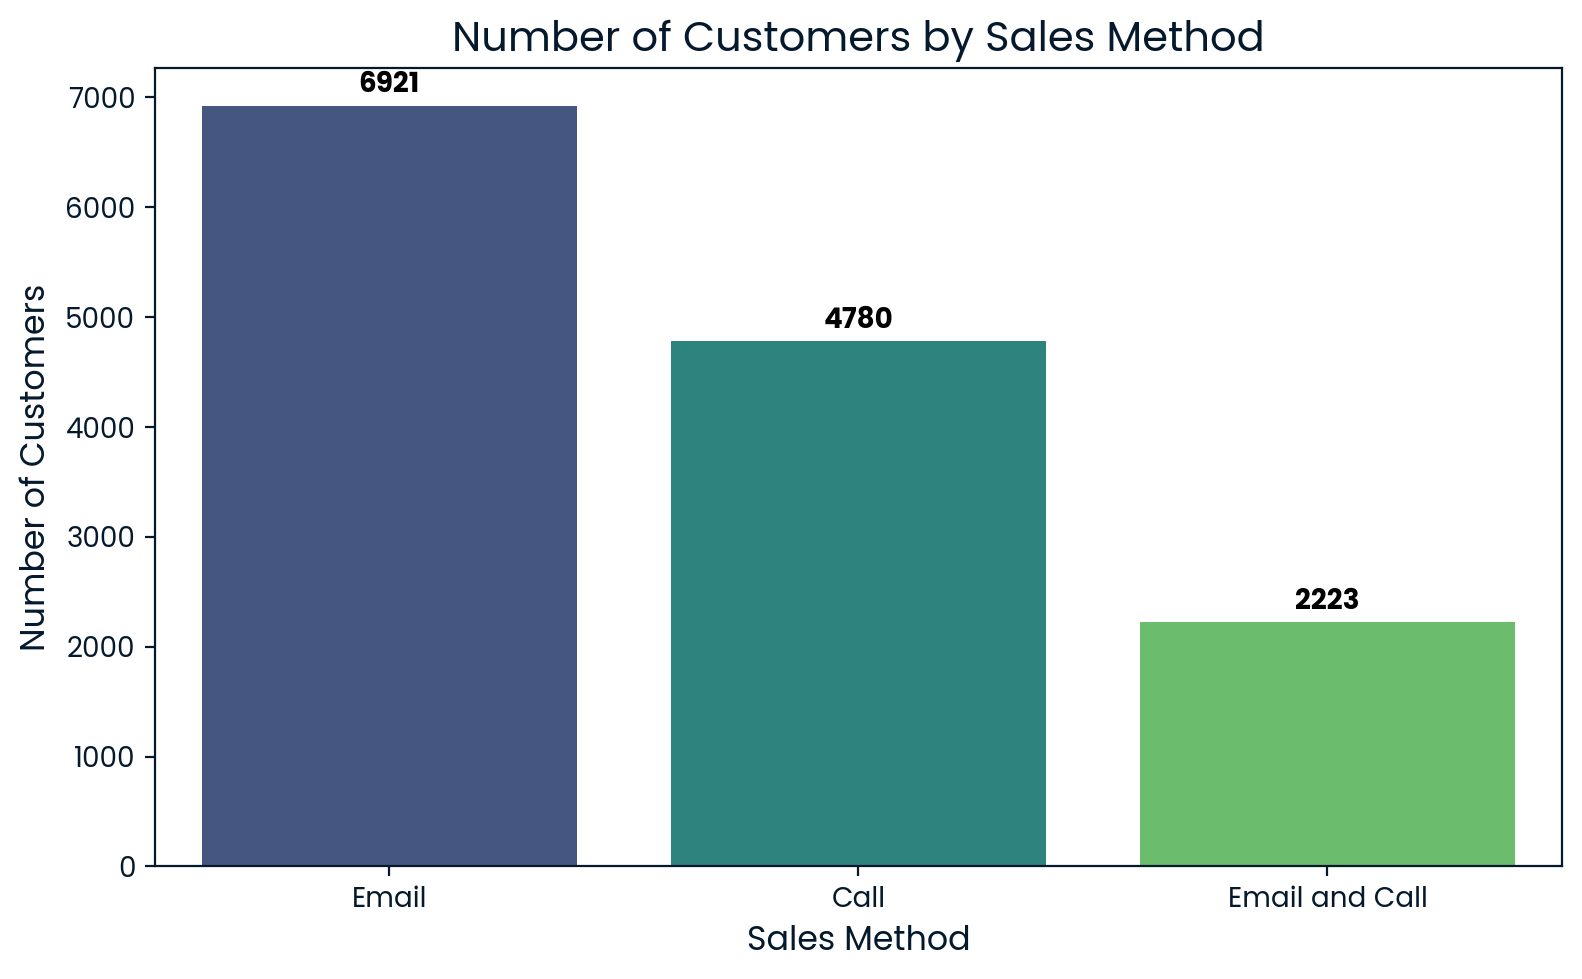

In [24]:
# Visualization: Number of customer for each approach
plt.figure(figsize=(8,5))
sns.barplot(
    x=customers_per_method.index,
    y=customers_per_method.values,
    hue=customers_per_method.index,
    palette="viridis"
)
plt.title("Number of Customers by Sales Method", fontsize=15)
plt.xlabel("Sales Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(customers_per_method.values):
    plt.text(
        i, v + 50, str(v), color="black", ha="center", va="bottom", fontweight="bold"
    )
plt.tight_layout()
plt.show()

## What does the spread of the revenue look like overall? And for each method?

### Overall Revenue Spread
Overall, sales revenue has a right skewed distribution (most sales are low, a few are high). The mean revenue is 93.94 and the median revenue is 89.5, suggesting that there are some high-revenue sales events that drive up the mean. Revenue ranges from 32.54 to 238.32.

In [13]:
# Overall Revenue Spread
print("Overall Revenue Statistics:\n")
print(product_sales["revenue"].describe())

Overall Revenue Statistics:

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64


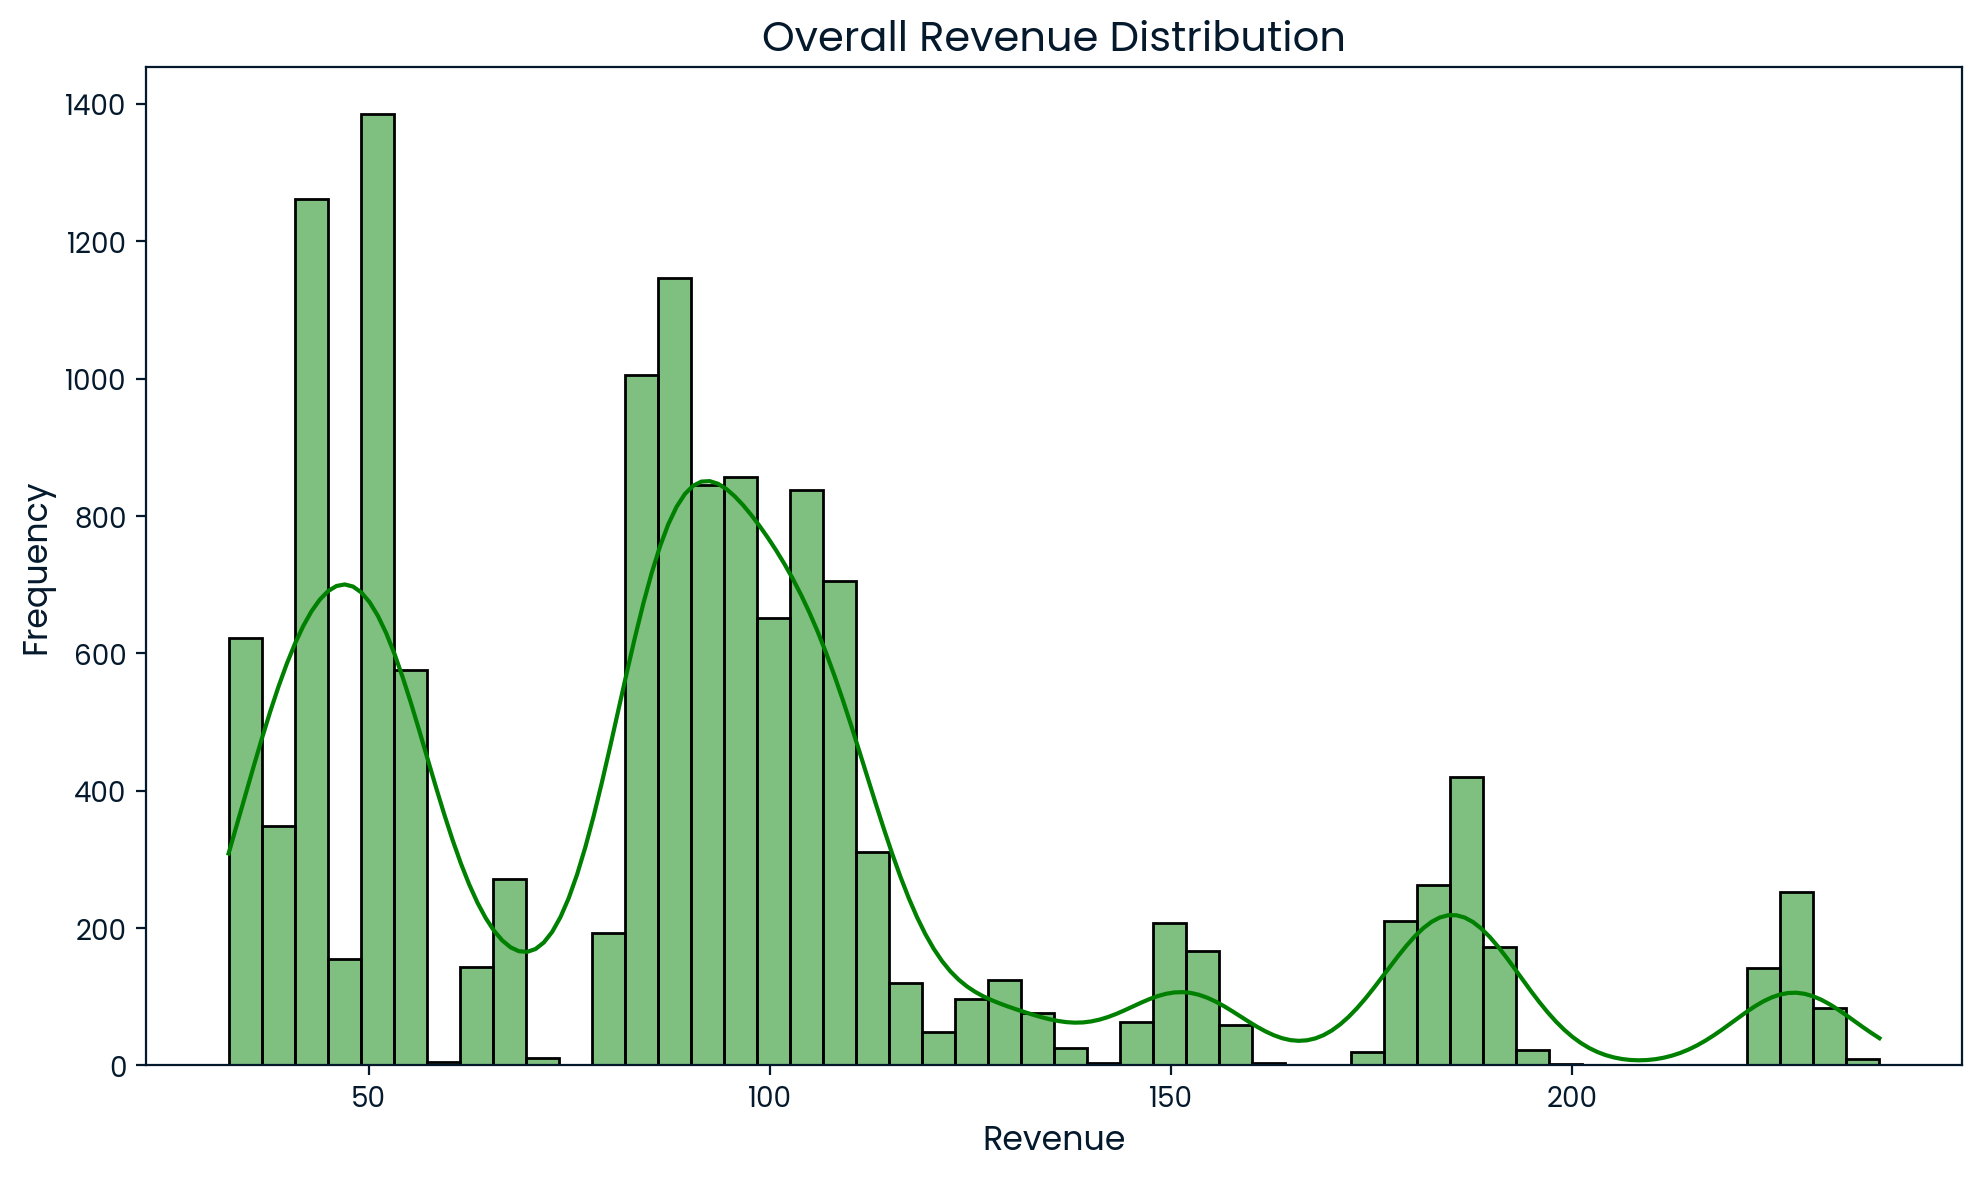

In [32]:
# Visualization: Overall Revenue Distribution (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(data=product_sales, x="revenue", kde=True, bins=50, color="Green")
plt.title("Overall Revenue Distribution", fontsize=15)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

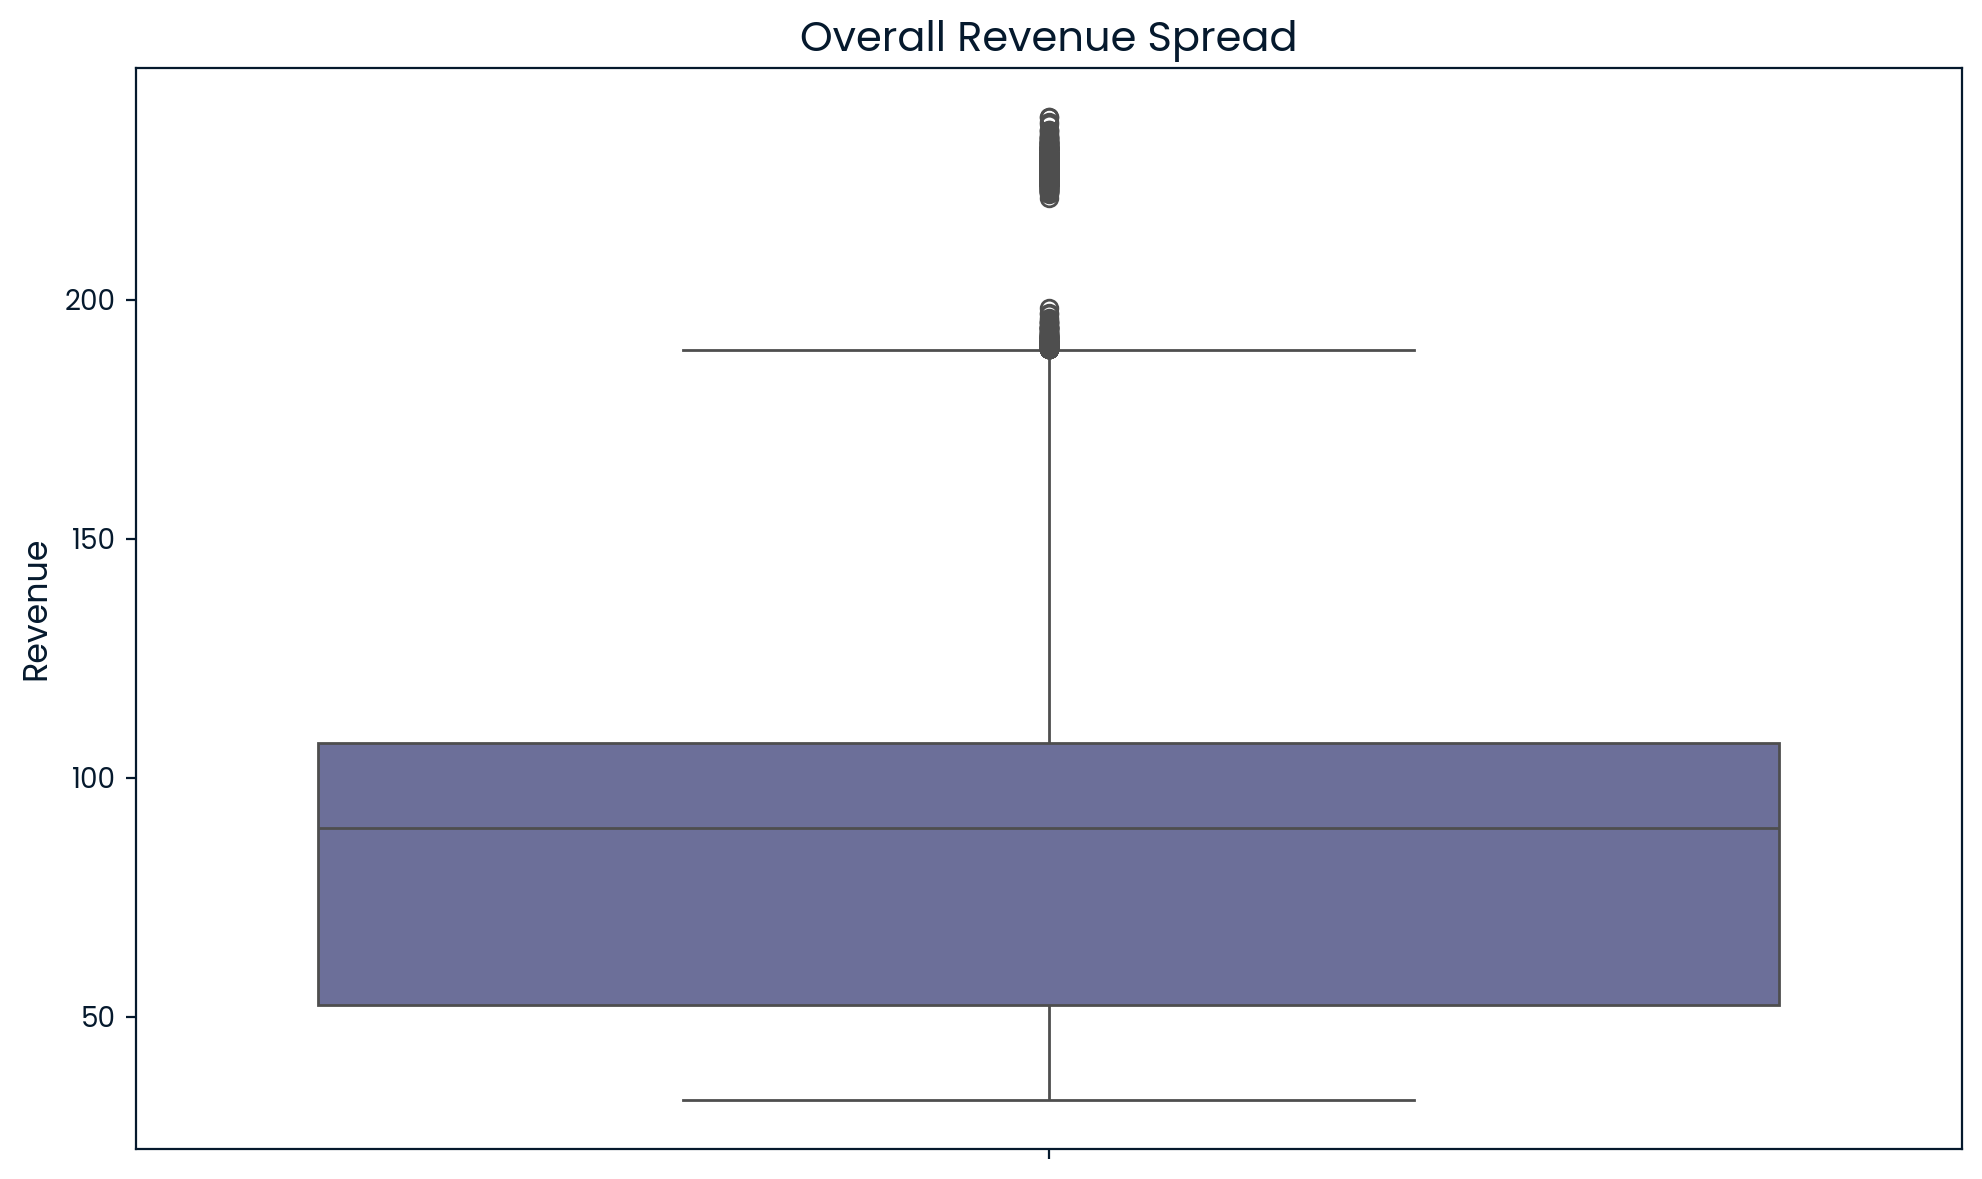

In [25]:
# Visualization: Overall Revenue Spread (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(y=product_sales["revenue"])
plt.title("Overall Revenue Spread", fontsize=15)
plt.ylabel("Revenue", fontsize=12)
plt.tight_layout()
plt.show()

### Revenue Spread by Sales Method
1. Telephone (Call)
    - The average and median revenues for this method are probably the lowest of the three methods. Although it covers a large number of customers, the revenue generated by individual customers is relatively low. Revenue distribution is likely to be more concentrated in the lower value areas.

2. Email
    - This method is expected to have higher average and median revenues than ‘Call’ marketing.

3. Email and Call
    - This method is expected to achieve the highest average and median revenues. Email warm-ups combined with follow-up targeted calls may be the most effective at converting leads into high-value orders. Its revenue distribution is likely to be relatively healthy with moderate dispersion.

In [16]:
print("\nRevenue Statistics by Sales Method:")
print(product_sales.groupby("sales_method")["revenue"].describe())


Revenue Statistics by Sales Method:
                 count        mean        std  ...     50%     75%     max
sales_method                                   ...                        
Call            4780.0   47.596866   8.610699  ...   49.05   52.68   71.36
Email           6921.0   97.127671  11.211279  ...   95.58  105.17  148.97
Email and Call  2223.0  183.651233  29.083924  ...  184.74  191.11  238.32

[3 rows x 8 columns]


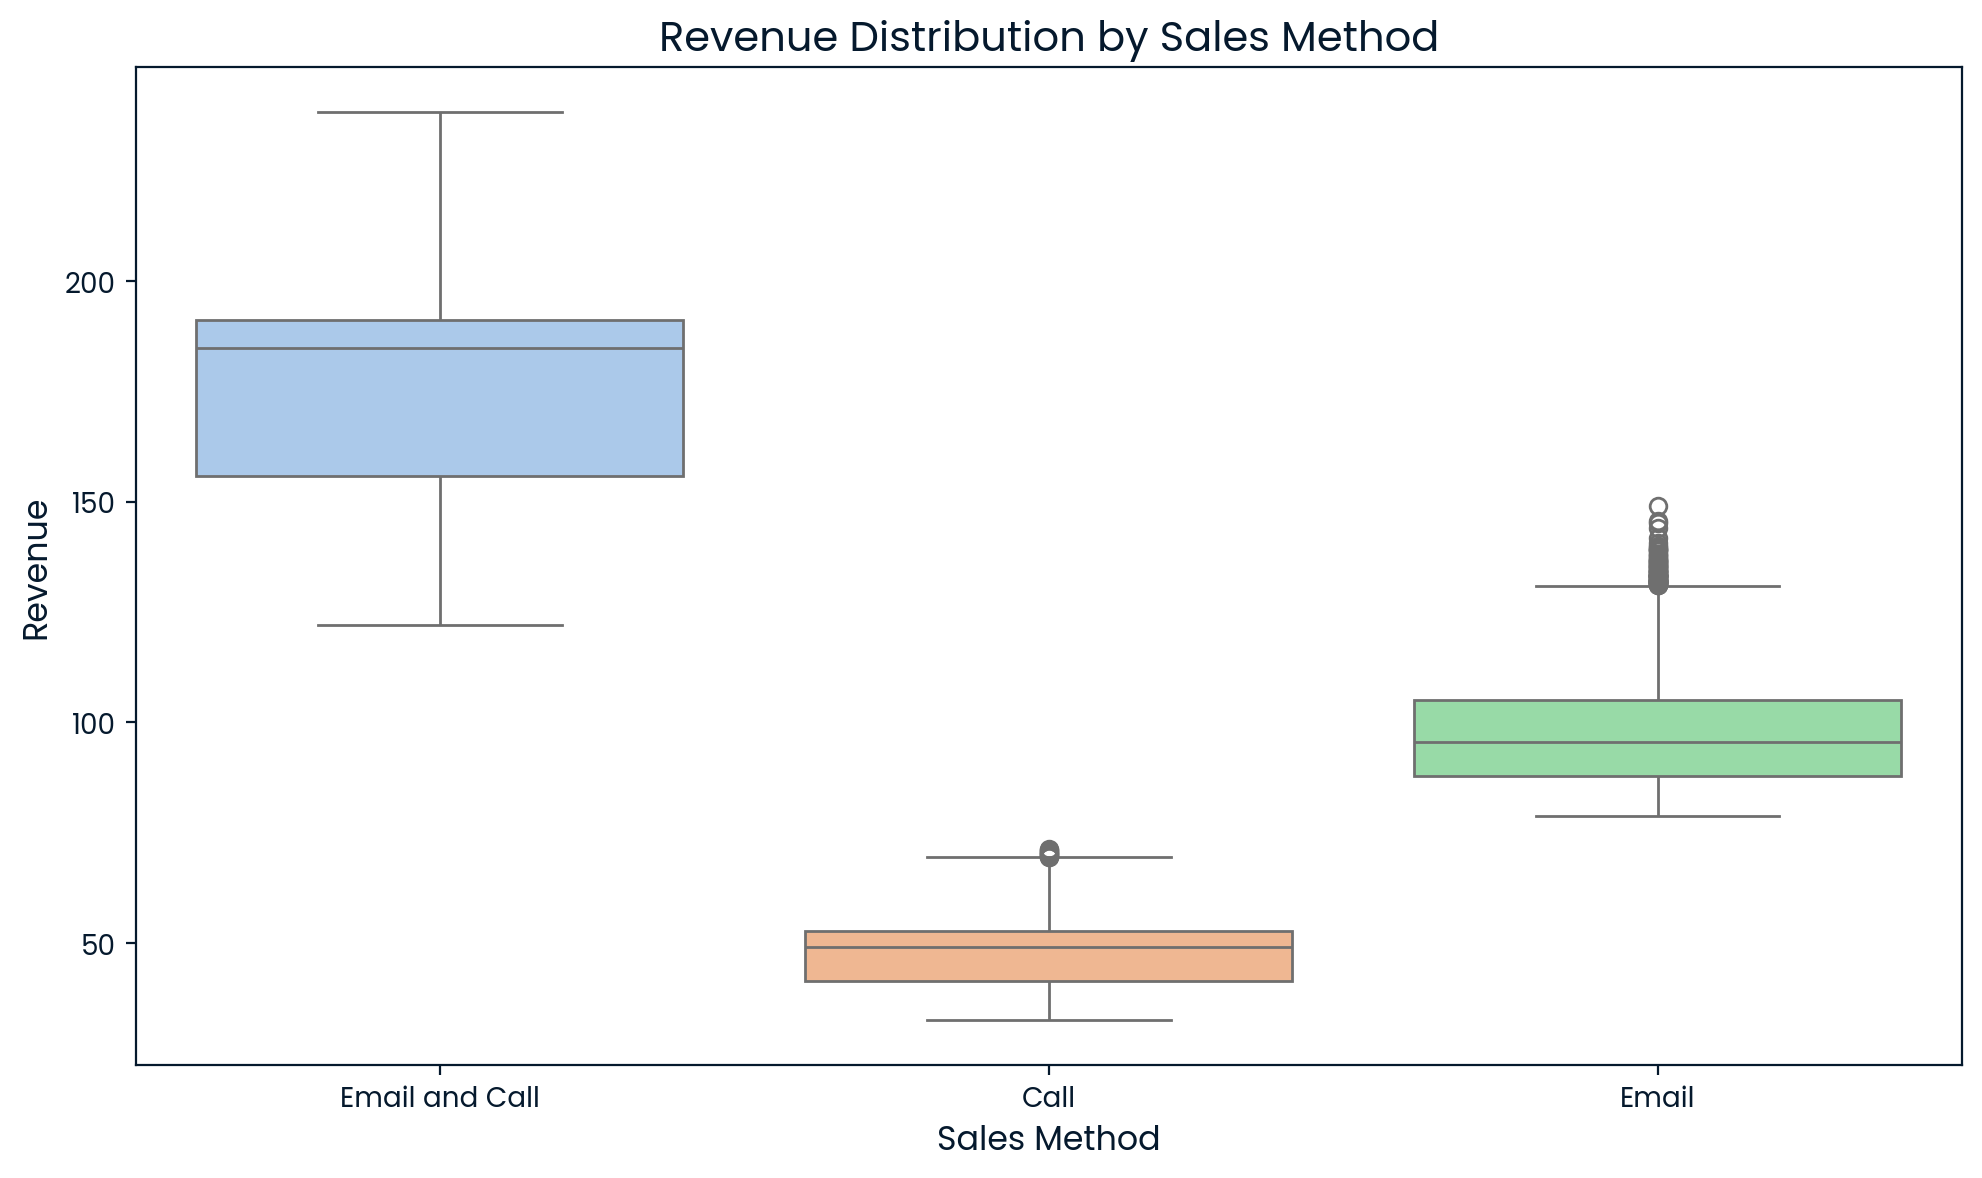

In [17]:
# Visualization: Revenue distribution by method (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(
    x="sales_method",
    y="revenue",
    data=product_sales,
    palette="pastel",
    hue="sales_method",
    legend=False,
)
plt.title("Revenue Distribution by Sales Method", fontsize=15)
plt.xlabel("Sales Method", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.tight_layout()
plt.show()

## Was there any difference in revenue over time for each of the methods?
- Email: Average weekly revenue may peak for a short period of time after an email is sent (e.g., after the first week of product launch and after the third week of follow up emails), and then may drop off.

- Call: Average weekly revenue may show a more steady or gradual increase as the sales team takes time to contact customers individually.

- Email and Call: Average weekly revenue from this method may be similar with the other two methods. However, it clearly has a higher conversion rate and brings in more revenue.

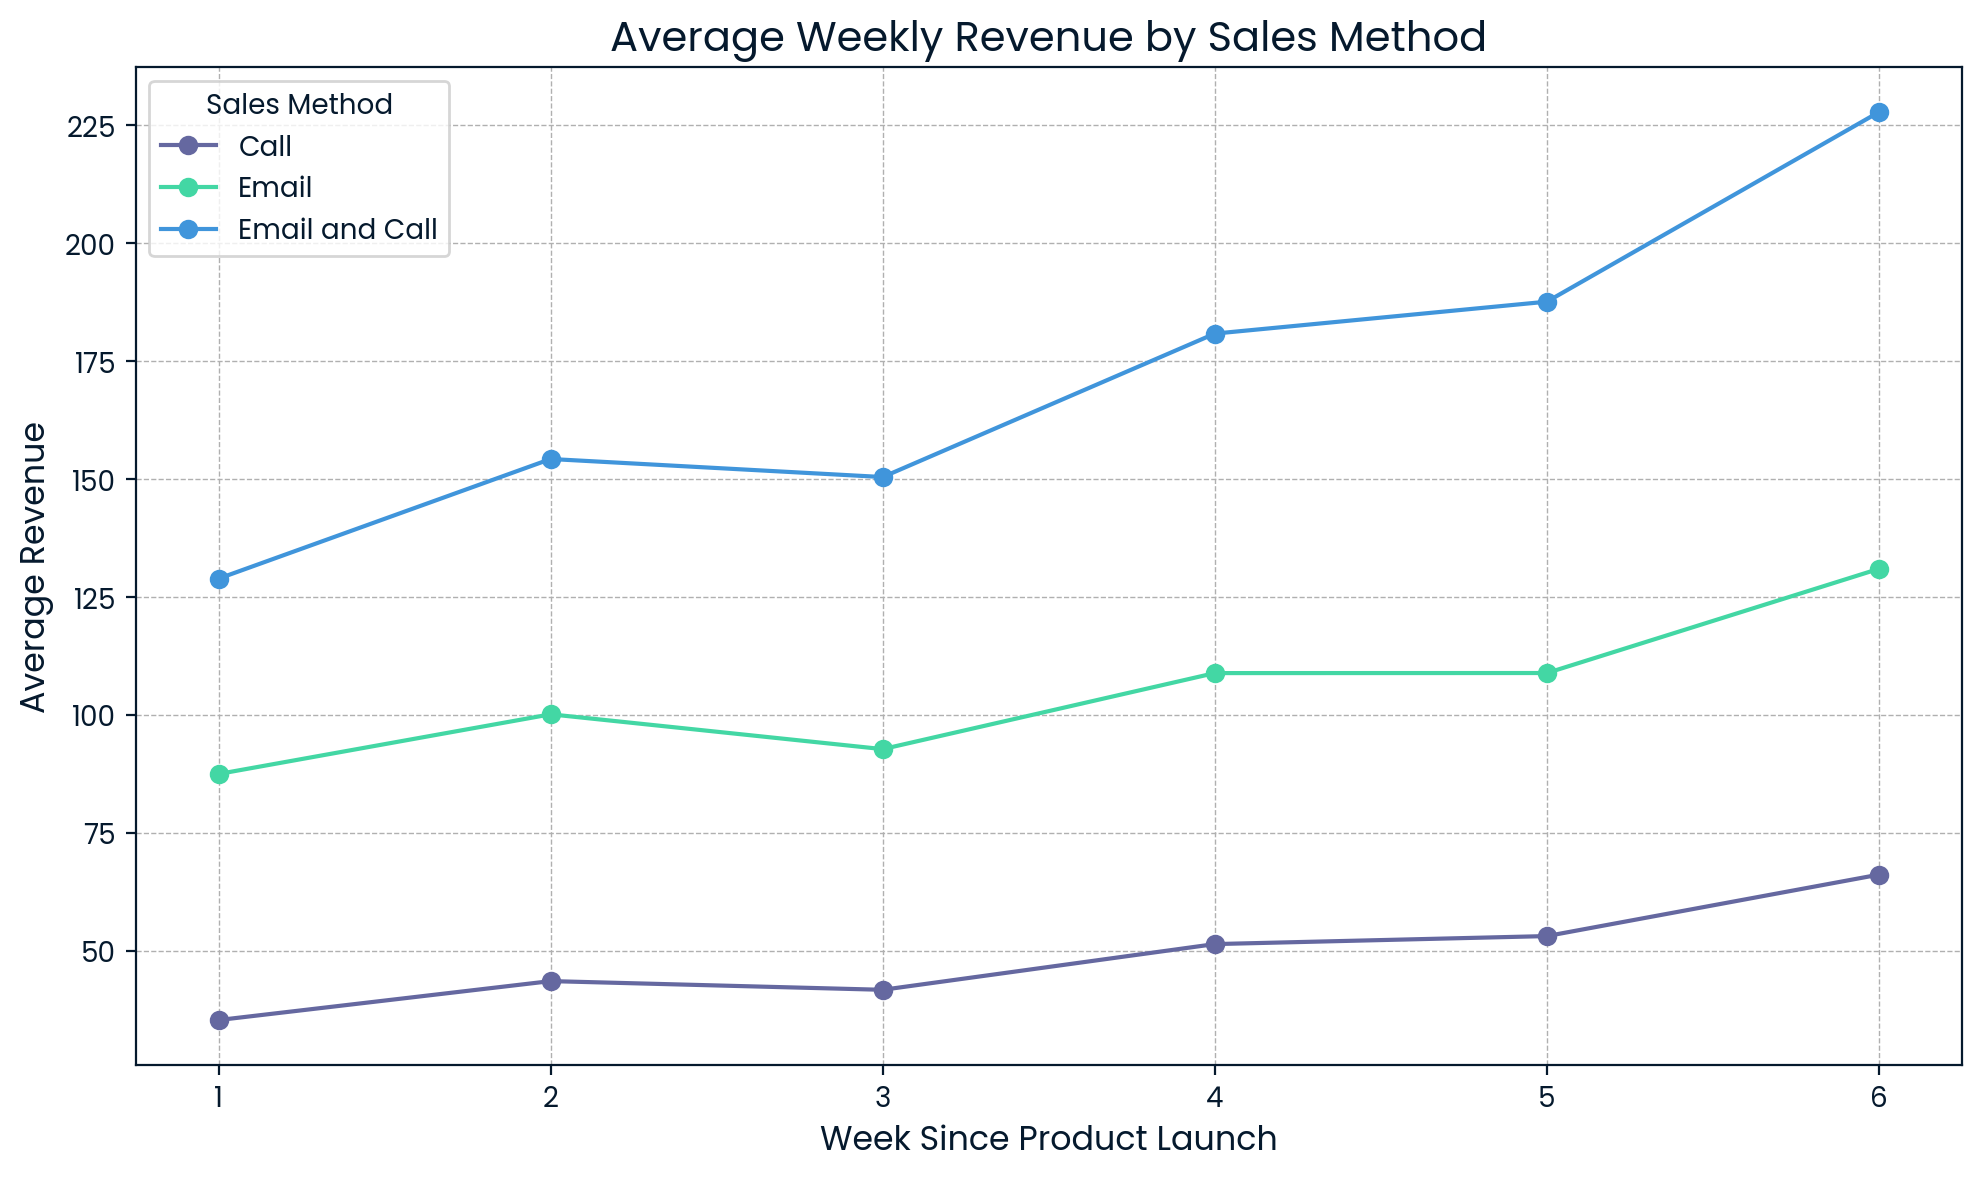

In [18]:
# Visualization: Revenue over time by method
revenue_over_time = product_sales.groupby(["week", "sales_method"])["revenue"].mean().unstack()
plt.figure(figsize=(10,6))
revenue_over_time.plot(kind="line", marker="o", ax=plt.gca())
# Plotting the average revenue over time
plt.title("Average Weekly Revenue by Sales Method", fontsize=15)
plt.xlabel("Week Since Product Launch", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.legend(title="Sales Method")
plt.xticks(sorted(product_sales["week"].unique()))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## Number of Site Visits for each sales method
- The average number of website visits is likely to be higher for customers who are contacted by ‘Email’, especially if the content of the email is effective in directing the customer to the website.

- Customers reached by ‘Call’ are likely to have a lower average number of website visits, which may mean that telemarketing is more focused on customers who are less active online.

- Customers who are reached by ‘Email and Call’ may have an highest number of website visits, but the difference is not too significant.

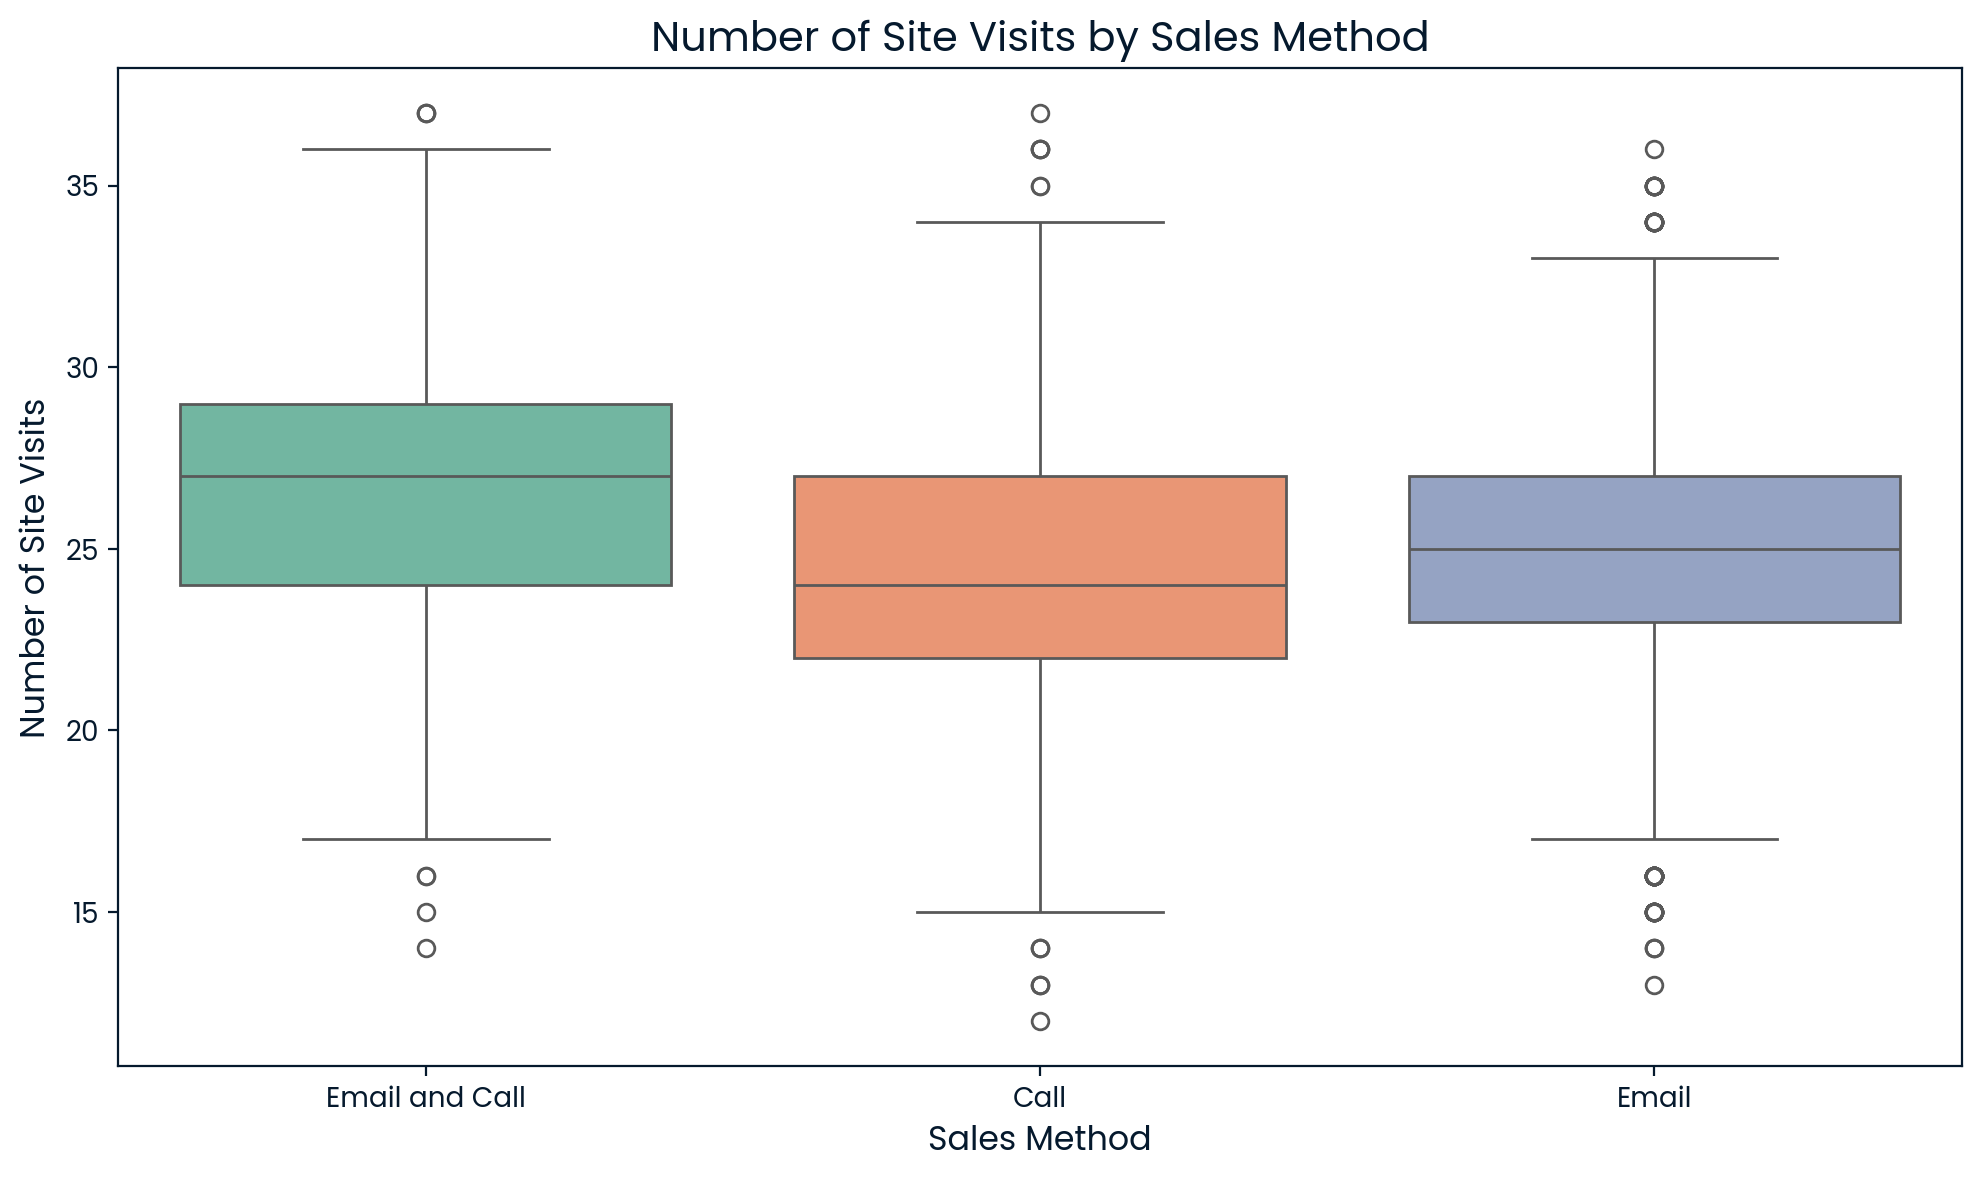


Average Number of Site Visits by Sales Method:
sales_method
Call              24.421757
Email             24.734142
Email and Call    26.738641
Name: nb_site_visits, dtype: float64


In [19]:
# Visualization: Number of site visits by method
plt.figure(figsize=(10,6))
sns.boxplot(
    x="sales_method",
    y="nb_site_visits",
    data=product_sales,
    palette="Set2",
    hue="sales_method",
)
plt.title("Number of Site Visits by Sales Method", fontsize=15)
plt.xlabel("Sales Method", fontsize=12)
plt.ylabel("Number of Site Visits", fontsize=12)
plt.tight_layout()
plt.show()
print("\nAverage Number of Site Visits by Sales Method:")
print(product_sales.groupby("sales_method")["nb_site_visits"].mean())

## Number of Products Sold per transaction for each method
- The average number of products sold per transaction is almost the same for both ‘Call’ and ‘Email’ methods.
- ‘Email and Call' marketing have the highest average number of products sold per transaction. Assuming that the combination of phone calls and emails is a good way to keep track of products going live in case the customer forgets or doesn't receive our sales message.

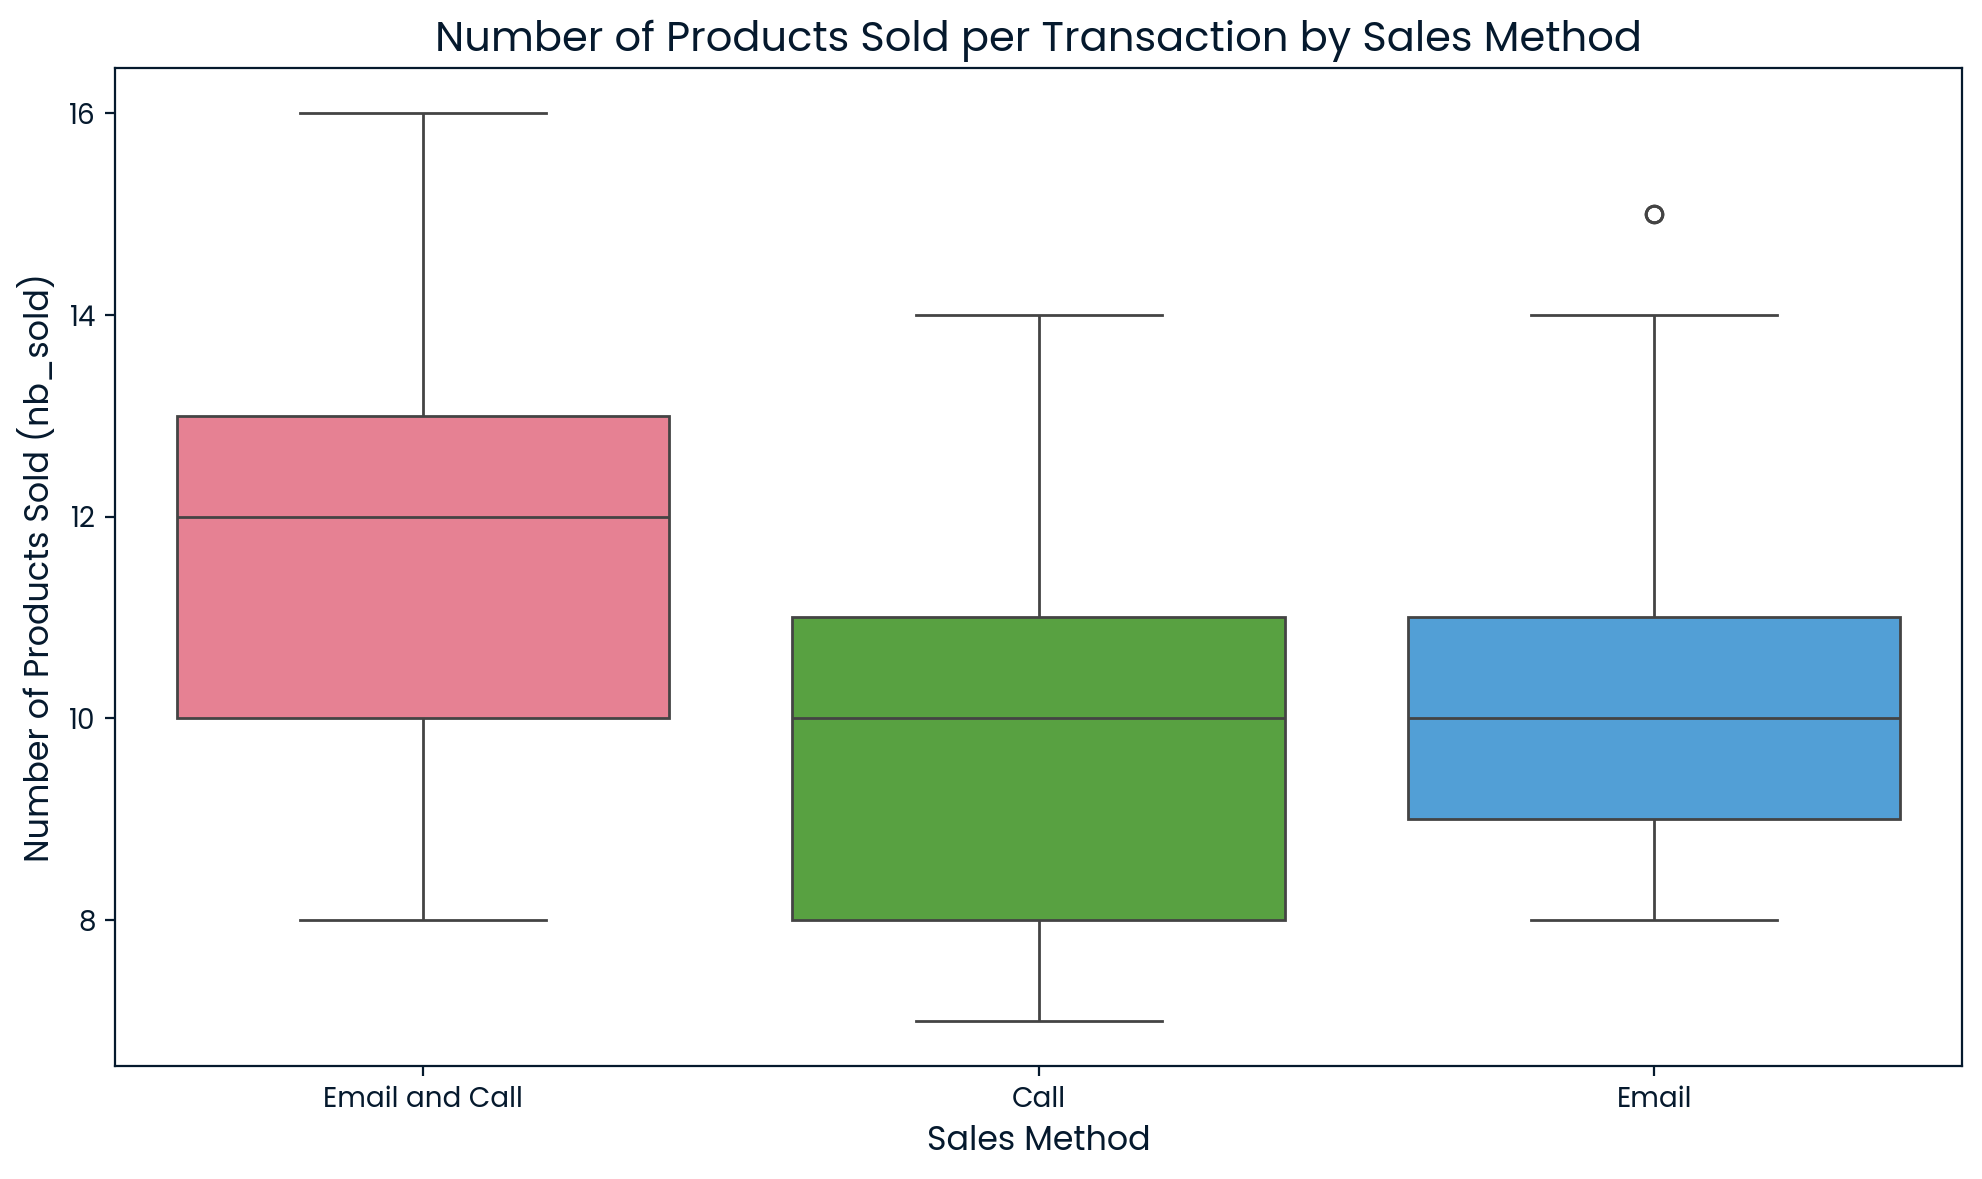


Average Number of Products Sold by Sales Method:
sales_method
Call               9.500837
Email              9.723017
Email and Call    12.186685
Name: nb_sold, dtype: float64


In [20]:
# Visualization: Number of Products Sold (nb_sold) per transaction by Sales Method
plt.figure(figsize=(10,6))
sns.boxplot(
    x="sales_method",
    y="nb_sold",
    data=product_sales,
    palette="husl",
    hue="sales_method",
    legend=False,
)
plt.title("Number of Products Sold per Transaction by Sales Method", fontsize=15)
plt.xlabel("Sales Method", fontsize=12)
plt.ylabel("Number of Products Sold (nb_sold)", fontsize=12)
plt.tight_layout()
plt.show()
print("\nAverage Number of Products Sold by Sales Method:")
print(product_sales.groupby("sales_method")["nb_sold"].mean())

# Business Metrics
Since our goal is to make sure we are using the best techniques to sell the new product effectively, I would recommend we use the revenue per Customer(RPC) as our metrics.

This metric measures the average revenue generated per customer by each sales method. It balances the return with the effort invested and helps assess the cost-effectiveness of each sales approach.

Currently, the RPC for each method is:
- Call: 47.60
- Email: 97.13
- Email and Call: 183.65

On average members of the team were on the phone for around thirty minutes per customer, while 'Email' marketing required very little work for the team. Obviously, the overall input-output ratio for 'Call' marketing is not ideal.

# Summary
- Email + Call yields the highest revenue per customer and per item.
- Calls alone underperform significantly, despite higher team effort.
- Email-only is low-effort but moderately effective and highly scalable.
- There is a small data quality issue: records labeled em + call should likely be Email + Call, and capitalise should be noticed. 

# Recommendation
Taking into account the above analyses and the time costs to be invested in the different methods (mail: low; phone: 30 minutes/customer on average; combination of mail and phone: low mail + 10 minutes/customer on average by phone), I propose the following:

1. Email and Call’ is the preferred strategy:

- REASON: While this strategy may not have the highest number of customers reached, it offers the best balance between revenue generation efficiency (higher average revenue and number of products sold per visit) and time investment (approximately 10 minutes on the phone, which is less time consuming than a pure phone call). The data shows that this approach is likely to deliver the highest average revenue and show continued growth potential over time.

- ACTION: Invest more resources in this combination of tactics and optimise the content of your emails to increase the success rate of your telephone appointments or follow-ups.

2. Continue and optimise the ‘Email’ marketing strategy:

- REASON: Email marketing is a cost-effective way to reach a large number of customers for initial market education and branding. While the average conversion value may not be high, the large base can still contribute to a significant number of customers.

- ACTION: Personalise and optimise email content and delivery times for different customer segments to increase open and conversion rates. This can be used as a pre-step to screen for high interest customers and provide leads for follow-up calls.

3. Use ‘Call’ marketing strategically:

- REASON: Pure telemarketing (30 minutes/customer on average) has the highest time cost and the overall ROI may not be as good as a ‘Email’ strategy.

- ACTION: Focus your pure telemarketing strategy on the highest-value, highest-potential customer segments, such as repeat customers with a high history of spending, prospects with a clear need for a specific product line, or customers who have shown a high level of interest in other marketing activities.

4. Enhance data tracking and effectiveness evaluation:

- REASON: Ongoing monitoring and evaluation is key to optimising your sales strategy.

- ACTION:
    - Track not only the final sales revenue, but also the conversion rate at each stage (e.g., email open rate, click-through rate, phone call rate, order completion rate, etc.).

    - Accurately record the actual time spent by the sales team on ‘phone’ and ‘email and phone’ tactics to more accurately evaluate the input-output ratio of the different tactics.

    - Review the sales data regularly (e.g. monthly or quarterly) and adjust the strategy mix and resource allocation based on the actual results.